# Time Series Forecast & Predictions

Analyze Walmart datasets to predict weekly sales based on store and dept.

# Dataset
The datasets chosen were provided by Walmart on the Kaggle website (https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting). The datasets consist of store features and historical sales data for 45 store in different regions.


# Description of Variables
The 'store' dataset contains store information - 3 variables and 45 observation:
- *Store:* store number
- *Type:* type of store (A, B, C)
- *Size:* store size

The 'features' dataset contains store features - 12 variables and 8190 observation:
- *Store:* store number
- *Date:* Date
- *Temperature:* temperature
- *Fuel_Price:* price of fuel
- *MarkDown1:* total for 1st markdown
- *MarkDown2:* total for 2nd markdown
- *MarkDown3:* total for 3rd markdown
- *MarkDown4:* total for 4th markdown
- *MarkDown5:* total for 5th markdown
- *CPI:* Consumer Price Index. A measure of changes in the purchasing-power of a currency and the rate of inflation.
- *Unemployment:* total unemployment
- *IsHoliday:* is it a holiday or non-holiday (True = holiday, False =  non-holiday)

The 'train' datasets contain weekly sales - 5 variables and 421570 observation:
- *Store:* store number
- *Dept:* department number
- *Date:* Date
- *Weekly_Sales:* weekly sales
- *IsHoliday:* is it a holiday or non-holiday (True = holiday, False =  non-holiday)  

The 'test' dataset is similar to the 'train' dataset. It contains weekly sales - 5 variables and 115064 observation. This dataset will be use for the sales predictions. 
- *Store:* store number
- *Dept:* department number
- *Date:* Date
- *IsHoliday:* is it a holiday or non-holiday (True = holiday, False =  non-holiday) 

# Problem Statement
According to the Kaggle site, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. 

The goal is to predict the department-wide sales for each department in each store. 

# Load Libraries

In [219]:
#Load Library
import pandas as pd #data analysis and dataframe
from pandas import DataFrame, Series
import numpy as np #multi-dimensional array for effecient math and logic operations
import matplotlib.pyplot as plt #2D & 3D graphics library for generating scientific figures
import seaborn as sns #descriptive statistics and visualizations runs on top of matplotlib

import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

#allows graphs to display without using plt.show()
%matplotlib inline 


In [220]:
#Format DataFrames, Series, Tuple for easy view
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read() #requires both files saved in the same folder as the current notebook
HTML('<style>{}</style>'.format(css))

# Exploring the data

In [221]:
#Load Data sets
stores_raw = pd.read_csv('stores.csv')
features_raw = pd.read_csv('features.csv')
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

In [222]:
from IPython.display import display

display(stores_raw.head())
display(stores_raw.tail())

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [223]:
display(stores_raw.info())
display(stores_raw.describe()) #Date Range

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


None

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [224]:
display(features_raw.head())
display(features_raw.tail())

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [225]:
from IPython.display import display

#Change object 'Date' to datetime 
features_raw['Date'] =  pd.to_datetime(features_raw['Date'])

display(features_raw.info())
display(features_raw.Date.describe()) #Date Range

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 711.9 KB


None

count                    8190
unique                    182
top       2011-07-15 00:00:00
freq                       45
first     2010-02-05 00:00:00
last      2013-07-26 00:00:00
Name: Date, dtype: object

features dataset contains approximately 4 years worth of data: 2010-2013

In [226]:
display(train_raw.head())
display(train_raw.tail())
display(train_raw.describe())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [227]:
#Change object 'Date' to datetime 
train_raw['Date'] =  pd.to_datetime(train_raw['Date'])

display(train_raw.info())
display(train_raw.Date.describe()) #Date Range

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


None

count                  421570
unique                    143
top       2011-12-23 00:00:00
freq                     3027
first     2010-02-05 00:00:00
last      2012-10-26 00:00:00
Name: Date, dtype: object

train dataset contains approximately 3 years worth of data: 2010-2012

In [228]:
display(test_raw.head())
display(test_raw.tail())

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


,Store,Dept,Date,IsHoliday
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


In [229]:
#Change object 'Date' to datetime 
test_raw['Date'] =  pd.to_datetime(test_raw['Date'])

display(test_raw.dtypes)
display(test_raw.describe())

Store                 int64
Dept                  int64
Date         datetime64[ns]
IsHoliday              bool
dtype: object

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


Test dataset contains 2012-2013 with no weekly sales data. Weekly_Sales Predictions will be made using the test dataset.

# Data Visualization

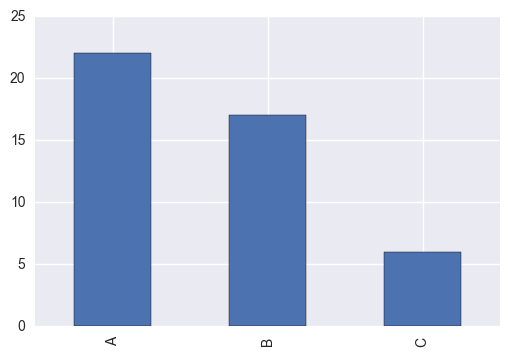

In [230]:
stores_raw.Type.value_counts().plot(kind='bar')
plt.show()

**Insight:** Walmart has more store type A than B or C. 

**Question:** Why more type A than B or C?  

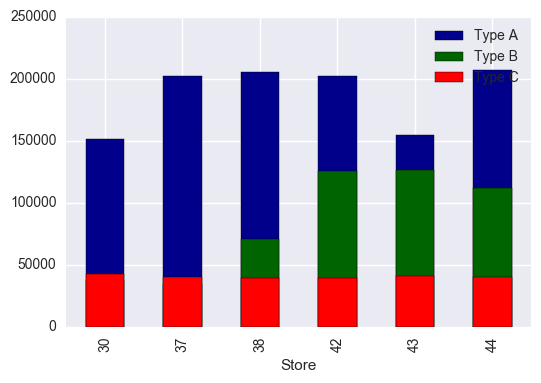

In [231]:
Store_TypeA = stores_raw[stores_raw['Type'] == 'A']
Store_TypeB = stores_raw[stores_raw['Type'] == 'B']
Store_TypeC = stores_raw[stores_raw['Type'] == 'C']

ax=Store_TypeA.plot(x='Store', y='Size', kind='bar', color='DarkBlue', label='Type A')
Store_TypeB.plot(x='Store', y='Size', kind='bar', color='DarkGreen', label='Type B', ax=ax)
Store_TypeC.plot(x='Store', y='Size', kind='bar', color='Red', label='Type C', ax=ax)

plt.show()

Walmart has more type A stores than B or C. Comparing sizes, type A store is also larger than B or C. We can safely assume store type must be categorized based on sizes.

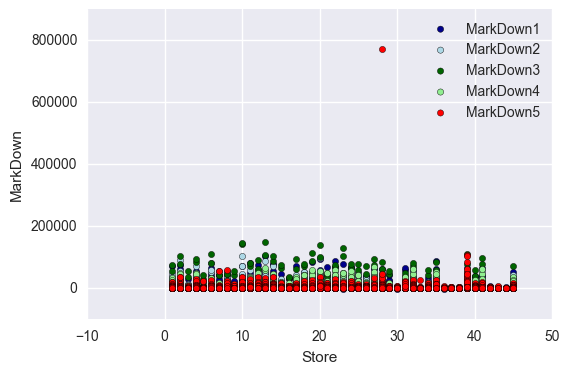

In [232]:
features = features_raw

ax=features.plot(x='Store', y='MarkDown1', kind='scatter', color='DarkBlue', label='MarkDown1')
features.plot(x='Store', y='MarkDown2', kind='scatter', color='LightBlue', label='MarkDown2', ax=ax)
features.plot(x='Store', y='MarkDown3', kind='scatter', color='DarkGreen', label='MarkDown3', ax=ax)
features.plot(x='Store', y='MarkDown4', kind='scatter', color='LightGreen', label='MarkDown4', ax=ax)
features.plot(x='Store', y='MarkDown5', kind='scatter', color='Red', label='MarkDown5', ax=ax)
ax.set_ylabel("MarkDown")

plt.show()

Majority of markdowns are under 20000. MarkDown5 has 1 large outlier. We may want to dive deeper. Perhaps take a look to see if the outlier shows that the markdown was during a holiday.

In [233]:
features.MarkDown5.max()
features.loc[features['MarkDown5'] > 200000]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
5059,28,2012-11-16,49.39,3.834,10431.55,184.51,42.72,1422.57,771448.1,131.3258,10.199,False


Outlier for MarkDown5 (771448) is on a non-holiday in Store 28. This could be an entry error. We can omit this outlier from the analysis.

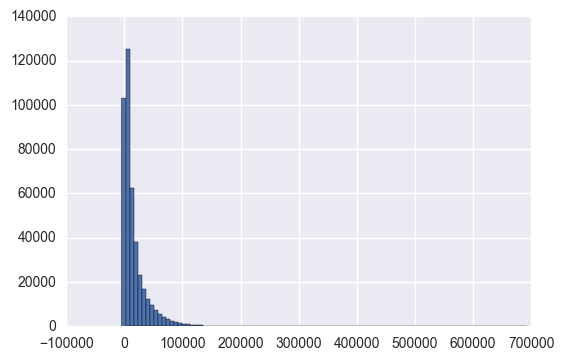

In [234]:
train=train_raw
plt.hist(train.Weekly_Sales.dropna(),100)
plt.show()

In [235]:
train1 = train_raw
train1['ID'] = train1['Store'].map(str) + "-" + train1['Dept'].map(str)

train1=train1.set_index('ID')
train1.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
ID,,,,,
1-1,1,1,2010-02-05,24924.50,False
1-1,1,1,2010-02-12,46039.49,True
1-1,1,1,2010-02-19,41595.55,False


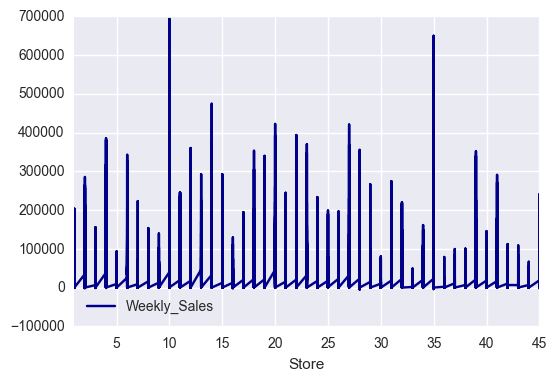

In [236]:
ax=train1.plot(x='Store', y='Weekly_Sales', kind='line', color='DarkBlue', label='Weekly_Sales')

The top highest Weekly_Sales are in Store 10, 14, and 35.

In [237]:
t_store10=train1.loc[train1['Store'] == 10]
display(t_store10.head())
display(t_store10.info())

,Store,Dept,Date,Weekly_Sales,IsHoliday
ID,,,,,
10-1,10,1,2010-02-05,40212.84,False
10-1,10,1,2010-02-12,67699.32,True
10-1,10,1,2010-02-19,49748.33,False
10-1,10,1,2010-02-26,33601.22,False
10-1,10,1,2010-03-05,36572.44,False


<class 'pandas.core.frame.DataFrame'>
Index: 10315 entries, 10-1 to 10-98
Data columns (total 5 columns):
Store           10315 non-null int64
Dept            10315 non-null int64
Date            10315 non-null datetime64[ns]
Weekly_Sales    10315 non-null float64
IsHoliday       10315 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 413.0+ KB


None

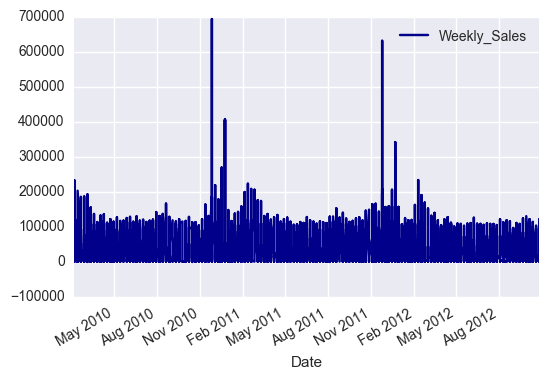

In [238]:
ax=t_store10.plot(x='Date', y='Weekly_Sales', kind='line', color='DarkBlue', label='Weekly_Sales')
plt.show()

The spikes in December indicates that Weekly_Sales appear to be seasonal.

In [239]:
t_store10.loc[t_store10['Weekly_Sales'] > 600000]

,Store,Dept,Date,Weekly_Sales,IsHoliday
ID,,,,,
10-72,10,72,2010-11-26,693099.36,True
10-72,10,72,2011-11-25,630999.19,True


Dept 72 contains the highest Weekly_Sales in Store 10. Both Weekly_Sales are in November(Thanksgiving Holiday).

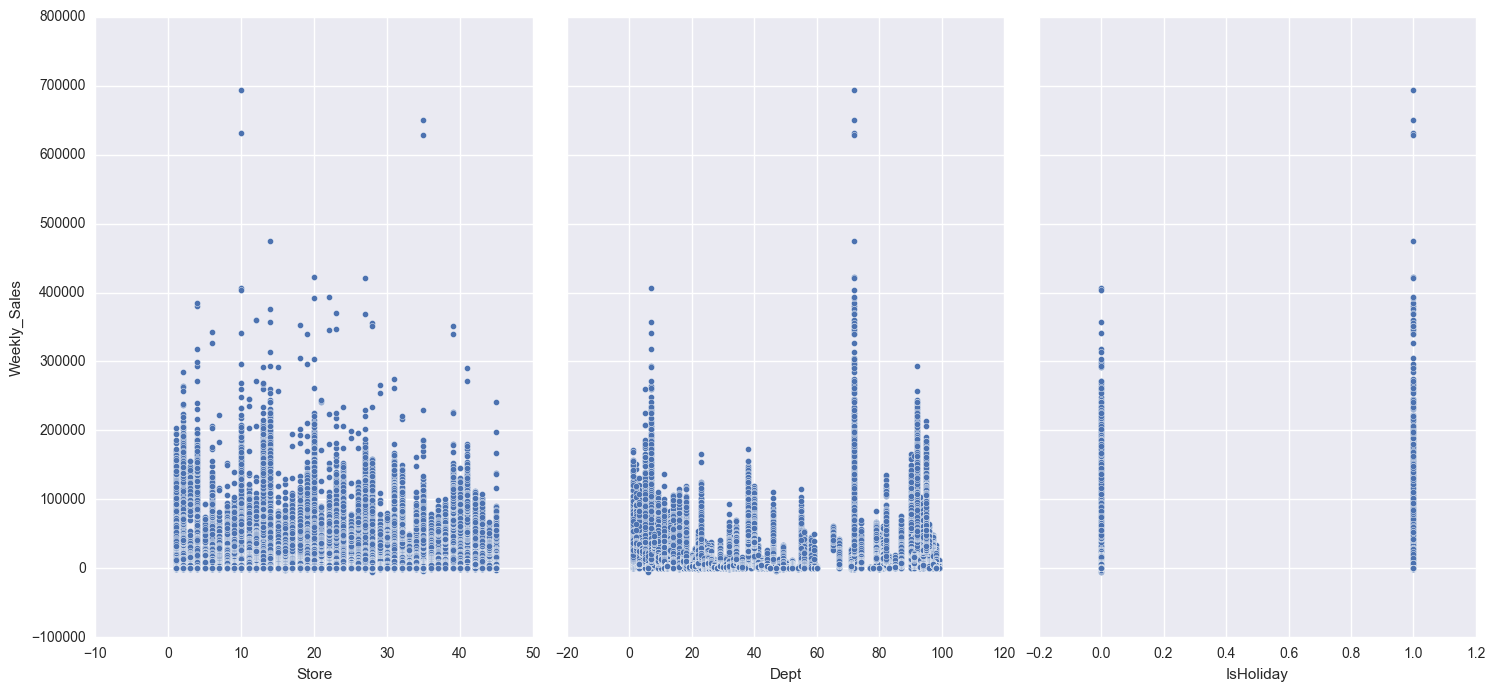

In [240]:
#visualize the relationship between Weekly_Sales and the response variables using scatterplots
sns.pairplot(train1, x_vars=['Store','Dept','IsHoliday'],y_vars='Weekly_Sales', size=7, aspect=0.7)

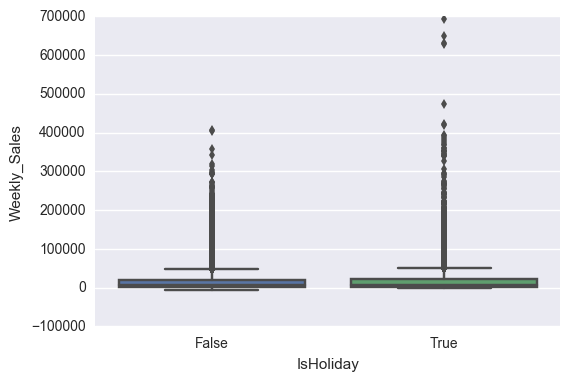

In [241]:
sns.boxplot(train.IsHoliday, train.Weekly_Sales)
plt.show()

As expected, holidays have higher Weekly_Sales.

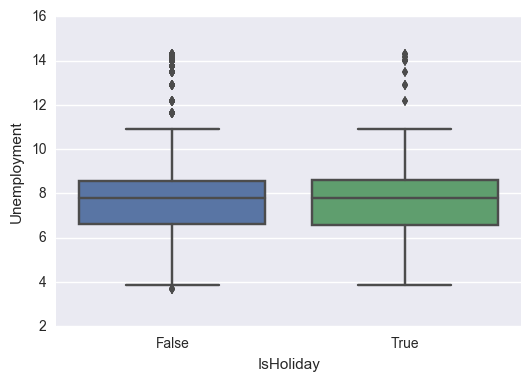

In [242]:
sns.boxplot(features.IsHoliday, features.Unemployment) #grouped by Unemployment
plt.show()

Unemployment is fairly consistent with holidays as it is with non-holidays. No significant difference between them.

# Correlation Matrix

In [243]:
features.corr('spearman')

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Store,1.000000,-0.024281,0.074047,-0.276347,-0.005243,-0.125992,-0.049746,-0.182119,-0.232992,0.286427,0.000000
Temperature,-0.024281,1.000000,0.099285,-0.116219,-0.401877,-0.140568,0.160056,-0.041520,0.121019,0.090026,-0.155535
Fuel_Price,0.074047,0.099285,1.000000,0.156084,-0.110392,-0.132549,0.140630,-0.021889,-0.068086,-0.039765,-0.084376
MarkDown1,-0.276347,-0.116219,0.156084,1.000000,0.232740,0.217726,0.729056,0.557054,0.002473,0.048449,0.012899
MarkDown2,-0.005243,-0.401877,-0.110392,0.232740,1.000000,0.009247,0.080988,0.111566,-0.032724,0.018040,0.080642
MarkDown3,-0.125992,-0.140568,-0.132549,0.217726,0.009247,1.000000,0.048856,0.210455,-0.048408,-0.002781,0.212463
MarkDown4,-0.049746,0.160056,0.140630,0.729056,0.080988,0.048856,1.000000,0.407678,-0.093577,0.087846,-0.051837
MarkDown5,-0.182119,-0.041520,-0.021889,0.557054,0.111566,0.210455,0.407678,1.000000,0.016135,0.012147,-0.068654
CPI,-0.232992,0.121019,-0.068086,0.002473,-0.032724,-0.048408,-0.093577,0.016135,1.000000,-0.392809,0.004119
Unemployment,0.286427,0.090026,-0.039765,0.048449,0.018040,-0.002781,0.087846,0.012147,-0.392809,1.000000,-0.002518


In the features dataset, Store and IsHoliday appears to have no correlations. 

There's a strong positive correlations between the MarkDown1 through MarkDown5. Since MarkDown1 through MarkDown5 are highly correlated, plotting the variables may provide further insights.

There's a moderate positive correlation between Fuel_Price and MarkDown1 through MarkDown5. We may also want to look into the relationship between these variables.

# Time Series Forecast Models

Let's select a Time Series Forecast Model such as an **autoregression model**. Why an autoregression model? Autoregression is a time series model that uses observations from pre
vious time steps as input to a regression equation to predict the value at the next time step. 

It is a very simple idea that can result in accurate forecasts on a range of time series problems.

In [244]:
train_raw = pd.read_csv('train.csv')

train_raw['Date']=pd.to_datetime(train_raw.Date)
print(train_raw.head()) 

   Store  Dept       Date  Weekly_Sales IsHoliday
0      1     1 2010-02-05      24924.50     False
1      1     1 2010-02-12      46039.49      True
2      1     1 2010-02-19      41595.55     False
3      1     1 2010-02-26      19403.54     False
4      1     1 2010-03-05      21827.90     False


            Weekly_Sales
Date                    
2010-02-05      24924.50
2010-02-12      46039.49
2010-02-19      41595.55
2010-02-26      19403.54
2010-03-05      21827.90


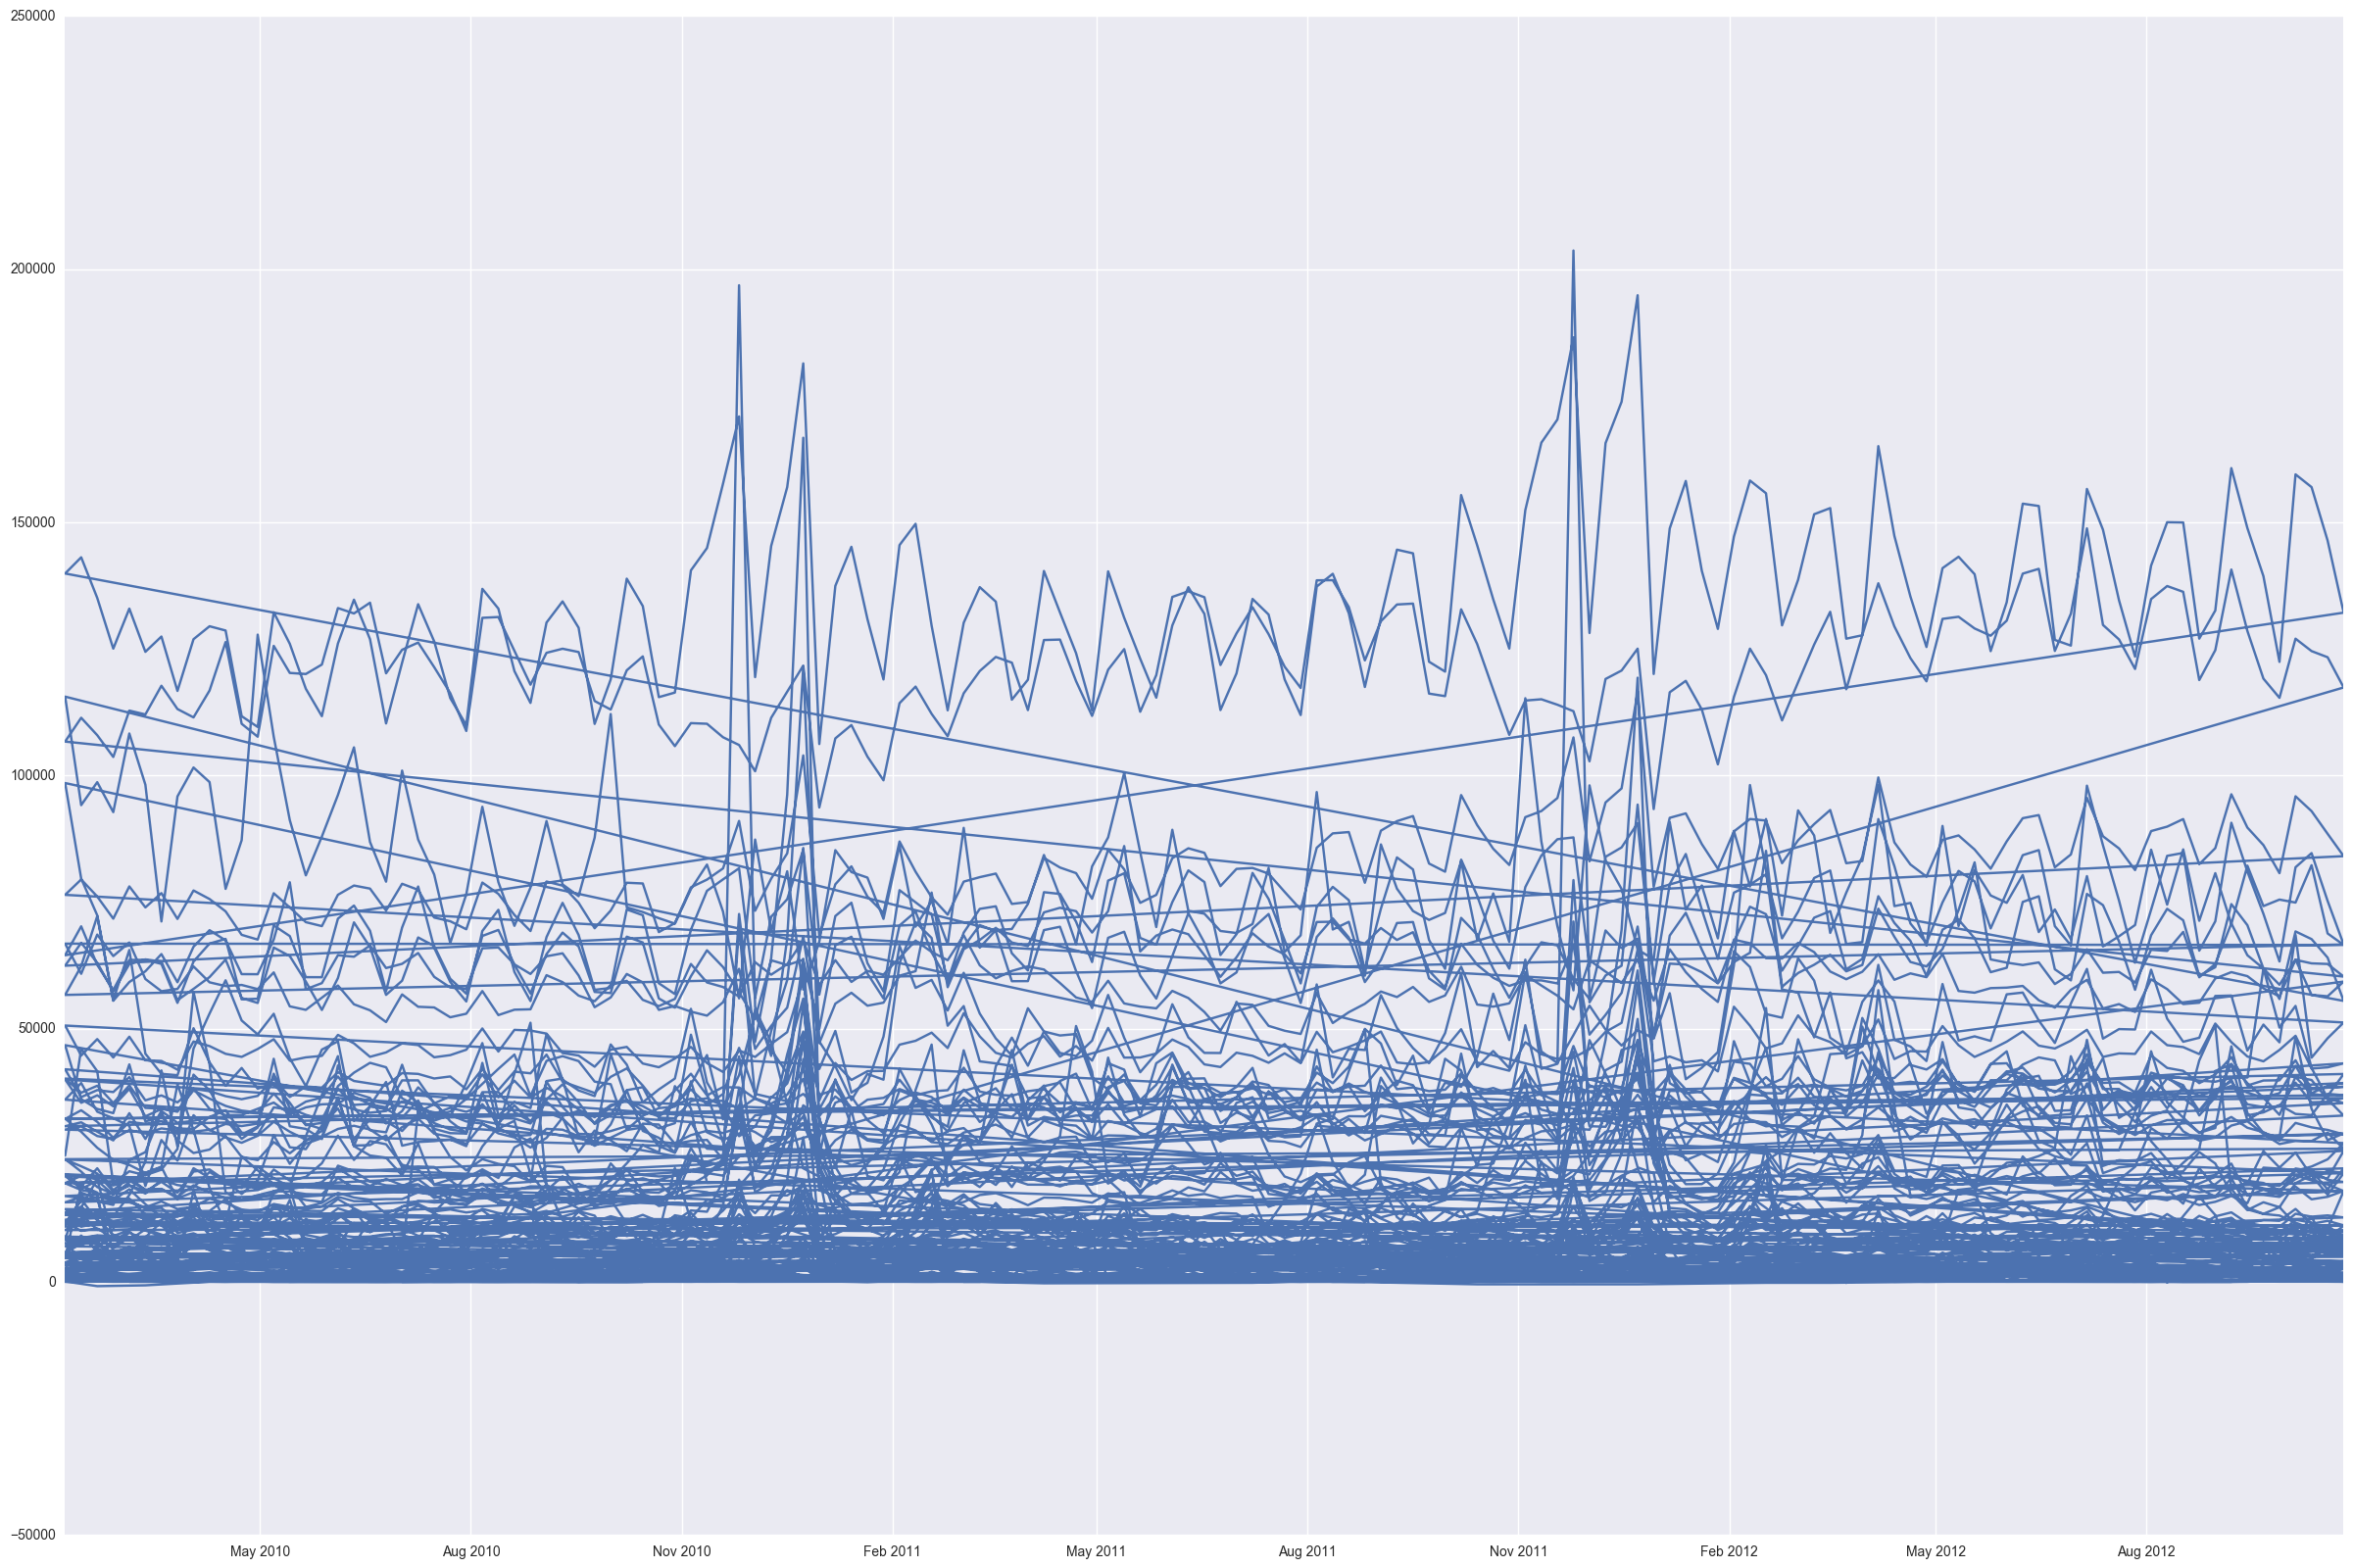

In [245]:
from pandas import Series
from matplotlib import pyplot 

tstore1=train_raw.loc[train_raw['Store'] == 1]

t_store1 = tstore1[['Date', 'Weekly_Sales']]
t_store1=t_store1.set_index('Date') # set 'Date' as index
t_store1.head()

plt.figure(figsize=(30,20))

print(t_store1.head())
pyplot.plot(t_store1)

Plot a subset containing only data for store 1 provides the above graph. Looks a bit crazy. Too many data points to give us any patterns or insights. Let's subset the data again and take a look at store 1, dept 1.

            Weekly_Sales
Date                    
2010-02-05      24924.50
2010-02-12      46039.49
2010-02-19      41595.55
2010-02-26      19403.54
2010-03-05      21827.90


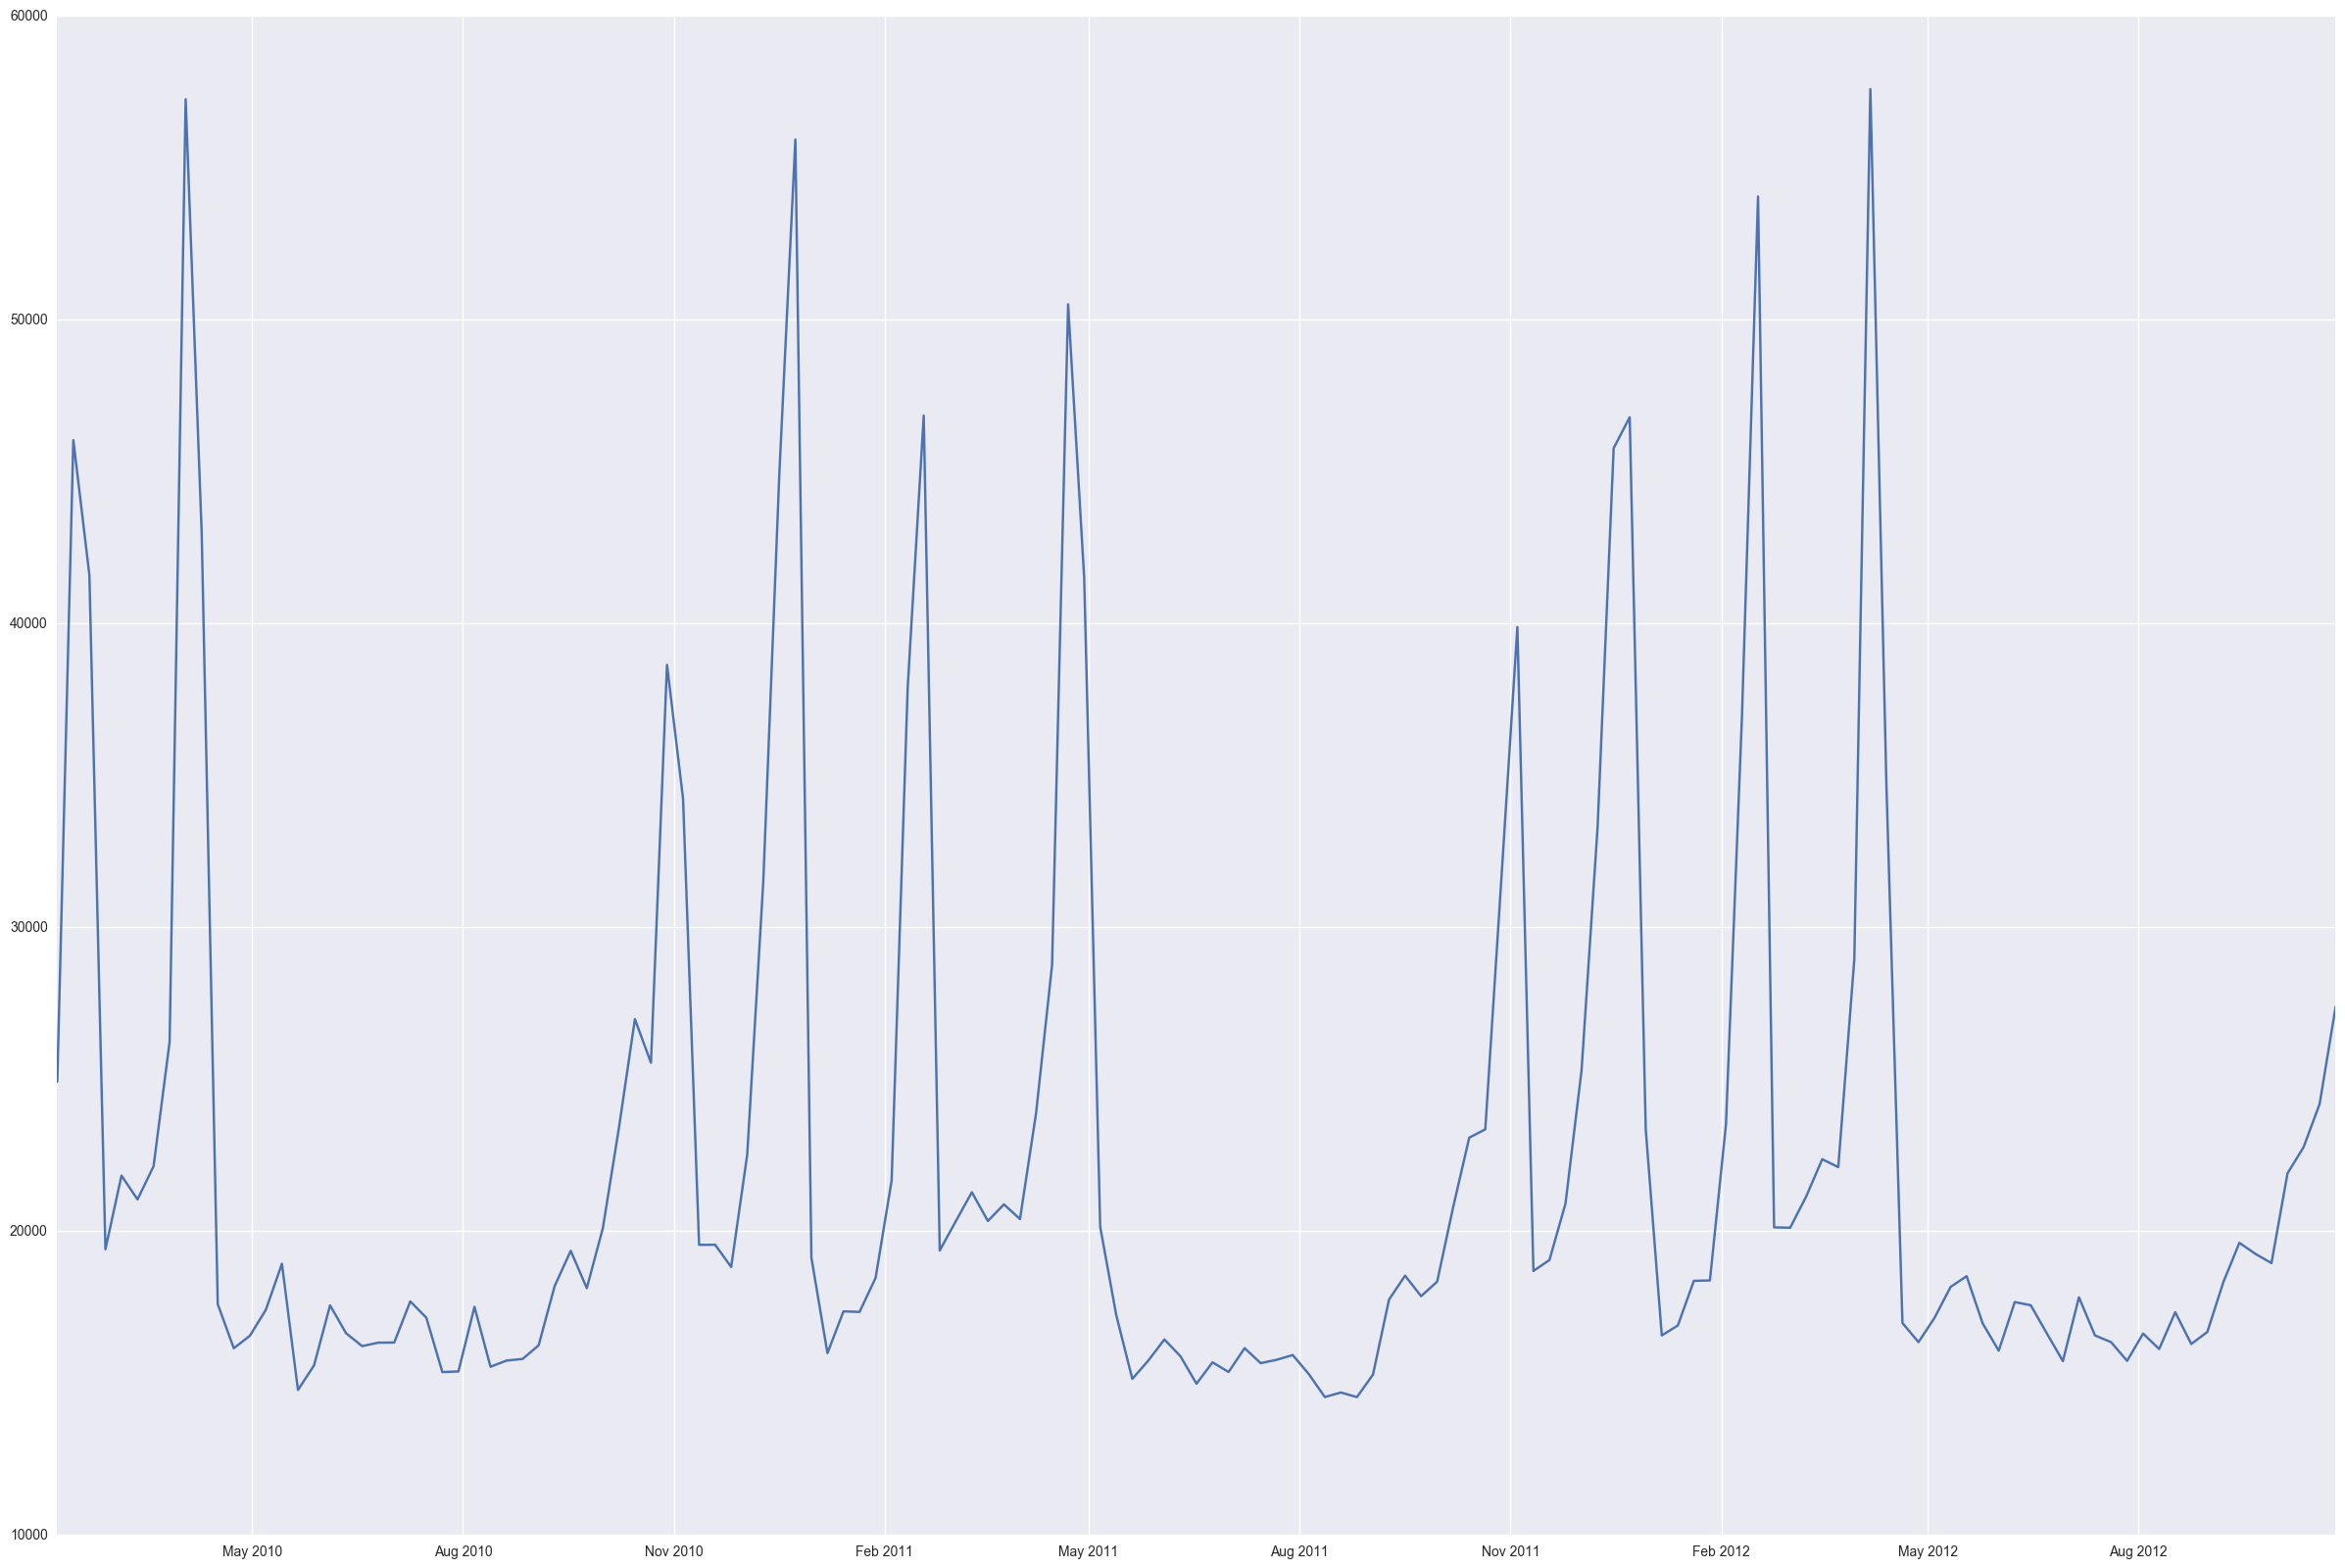

In [246]:
train1 = train_raw
train1['ID'] = train1['Store'].map(str) + "-" + train1['Dept'].map(str) # create 'ID' field containing Store# and Dept# 

tstore1dept1=train1.loc[train1['ID'] == '1-1']
tstore1dept1.head()

t_store1dept1 = tstore1dept1[['Date', 'Weekly_Sales']] # choose only 'Date' & 'Weekly_Sales'
t_store1dept1=t_store1dept1.set_index('Date') # set 'Date' as index
t_store1dept1.head()

plt.figure(figsize=(30,20))

print(t_store1dept1.head())
plt.plot(t_store1dept1)

Looks better. We can see that there are spikes in the data, again indicating the data has seasonality. An autoregression model may not be the best model to fit this data but let's continue and see what our predictions would look like applying this model.

# Define Methods and Partition Data

In [247]:
from pandas import Series
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy

# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

# make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

# split train dataset into train and validation sets
X = difference(t_store1dept1.values) # returns a array set with all the elements from the set that are not in an iterable
size = int(len(X) * 0.20) # partition 20% of the data
train, validation = X[0:size], X[size:] # set train to 80% and test to 20% 

# Use Autoregression Model to Forecast

In [248]:
# train autoregression
model = AR(train) # apply autoregression on train data set
model_fit = model.fit(maxlag=6, disp=False) # fit the model
window = model_fit.k_ar # determine the optimal lag
coef = model_fit.params # determine the coefficients

# Evaluate Forecast

In [249]:
# walk forward over time steps using the test data set
history = [train[i] for i in range(len(train))]

# walk-forward validation
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = validation[t]
    predictions.append(yhat)
    history.append(obs)
error = mean_squared_error(validation, predictions) # difference between test and predicted values

print('Test MSE: %.3f' % error)

Test MSE: 64922627.302


Running the example first prints the Mean Squared Error (MSE) of the predictions, which is 64922627.302 (or about 8057.46 weekly sales on average, if we take the square root to return the error score to the original units).

sqrt(51483954.67) = 8057.458

This is how well we expect the model to perform on average when making forecasts on new data.

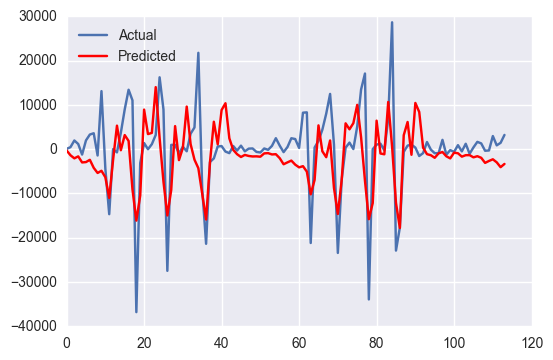

In [250]:
# plot the predictions using the test dataset against the actual data
plt.plot(validation, label="Actual")
plt.plot(predictions, label="Predicted",color='red')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

This may not be the very best possible model we could develop on this problem, but it is reasonable.

# Finalize and Save Time Series Forecast Model

In [251]:
# fit an AR model and save the whole model to file
from pandas import Series
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
import numpy

# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

# load full train dataset without splitting into train and test sets
training = train_raw[['Date', 'Weekly_Sales']]
training = training.set_index('Date') # set 'Date' as index
training.head()

X = difference(training.values) # returns a array set with all the elements from the set that are not in an iterable

# fit model
model = AR(X) # apply autoregression on full data set
model_fit = model.fit(maxlag=6, disp=False) # fit the model

# save model to .pkl file name 'ar_model.pkl'
model_fit.save('ar_model.pkl')

# save the differenced dataset with the filename 'ar_data.npy'
numpy.save('ar_diffdata.npy', X)

# save the last observations with the filename 'ar_obs.npy'
numpy.save('ar_lastobs.npy', [training.values[-1]])

In [252]:
# update the data for the AR model with a new obs
import numpy

# get real observation
observation = 48

# load the saved data
data = numpy.load('ar_diffdata.npy')
last_ob = numpy.load('ar_lastobs.npy')

# update and save differenced observation
diffed = observation - last_ob[0]
data = numpy.append(data, [diffed], axis=0)
numpy.save('ar_diffdata.npy', data)

# update and save real observation
last_ob[0] = observation
numpy.save('ar_lastobs.npy', last_ob)

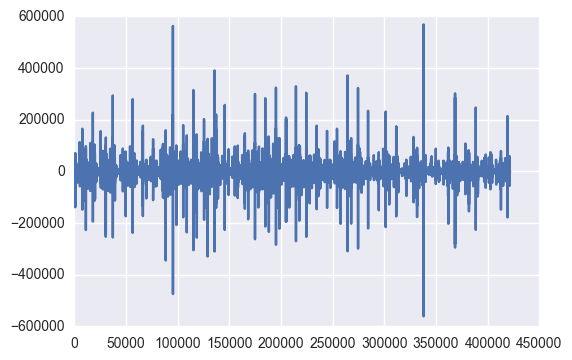

In [253]:
# plot the difference in the train dataset
plt.plot(X)
plt.show()

In [254]:
# walk forward over time steps using the test data set
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = train[t]
    predictions.append(yhat)
    history.append(obs)
error = mean_squared_error(train, predictions) # difference between test and predicted values

print('Test MSE: %.3f' % error)

IndexError: index 28 is out of bounds for axis 0 with size 28

# Forecast Future Sales

In [ ]:
plt.plot(train)

In [ ]:
train = pd.concat([train_raw, test_raw])
train = train[['Date', 'Weekly_Sales']] # choose only 'Date' & 'Weekly_Sales'
train=train.set_index('Date') # set 'Date' as index

In [ ]:
train.head()

In [ ]:
X = difference(train.values)
# train autoregression
model = AR(X) # apply autoregression on train data set
model_fit = model.fit(maxlag=60, disp=False) # fit the model
#window = model_fit.k_ar # determine the optimal lag
#coef = model_fit.params # determine the coefficients